# Исследование объявлений о продаже квартир

Исследование объявлений о продаже квартир
В качестве входных данных у нас данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В рамках этого проекта нужно установить параметры, которые влияют на рыночную стоимость недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Изучение данных из файла


In [2]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #присваиваем переменной значение data
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

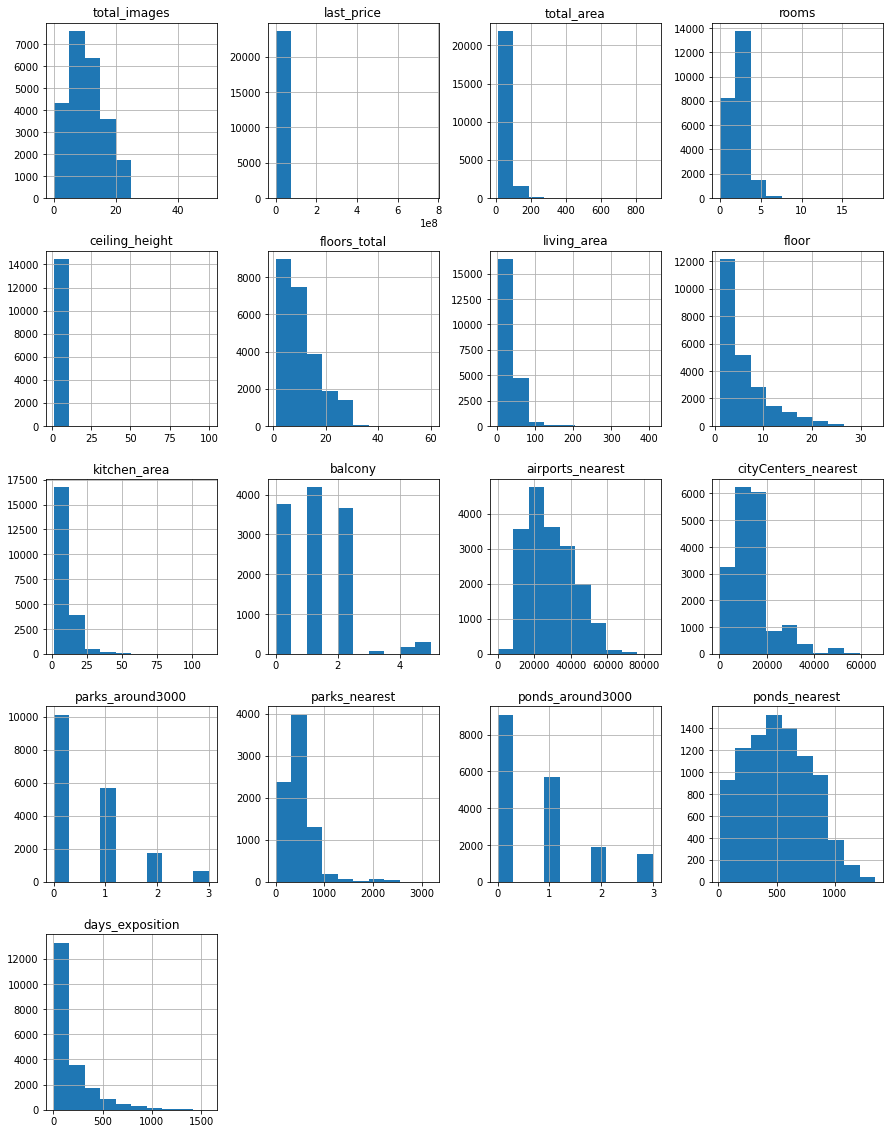

In [4]:
data.hist(figsize=(15, 20)) #выводим гистограммы 

In [17]:
duplicated_raws = data[data.duplicated()].sum()
duplicated_raws
#data.duplicated().sum()

total_images            0.0
last_price              0.0
total_area              0.0
first_day_exposition    0.0
rooms                   0.0
ceiling_height          0.0
floors_total            0.0
living_area             0.0
floor                   0.0
is_apartment            0.0
studio                  0.0
open_plan               0.0
kitchen_area            0.0
balcony                 0.0
locality_name           0.0
airports_nearest        0.0
cityCenters_nearest     0.0
parks_around3000        0.0
parks_nearest           0.0
ponds_around3000        0.0
ponds_nearest           0.0
days_exposition         0.0
dtype: float64

# Предобработка данных

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [19]:
print ('Количество пропущенных значений в столбце airports_nearest:',
(len(data[data['airports_nearest'].isna()])))

Количество пропущенных значений в столбце airports_nearest: 5542


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 5542 - вероятной причиной скорее всего 
является отстутсвие информации по данному параметру. Данные можно заполнить исходя из города 
(допустим если город Москва, то можно взять среднее растояние по имеющимся данным по этому городу).

In [20]:
print ('Количество пропущенных значений в столбце balcony:', (len(data[data['balcony'].isna()])))

Количество пропущенных значений в столбце balcony: 11519


Тип данных заменить на int
Количество пропущенных значений: 11519 - вероятной причиной скорее всего 
является пропуск в заполнении если балкон отсутствует. Данные можно заполнить исходя из того,
что если балкон отстутсвует, то значение 0

In [21]:
print ('Количество пропущенных значений в столбце ceiling_height:',
(len(data[data['ceiling_height'].isna()])))

Количество пропущенных значений в столбце ceiling_height: 9195


Количество пропущенных значений: 9195 - вероятной причиной скорее всего 
является отстутсвие информации по данному параметру. Данные можно заполнить исходя из 
средних параметров,но так как пропущено почти 40% это может существенно отразится 
на результатах исследования. До этого поменять аномальные значения. 


In [22]:
print ('Количество пропущенных значений в столбце floors_total:',
(len(data[data['floors_total'].isna()])))

Количество пропущенных значений в столбце floors_total: 86


Тип данных заменить на int
Количество пропущенных значений: 86 - вероятной причиной скорее всего 
является человеческий фактор или ошибка в выгрузке.
Пропуски можно просто удалить, что не скажется на исследовании. 

In [23]:
(len(data[data['days_exposition'].isna()]))

3181

Количество пропущенных значений: 3181 - вероятной причиной скорее всего отсутствие информации -
возможно, данные квартиры еще находятся в продаже (нужно изучить даты выставления на продажу), 
человеческий фактор или ошибка в выгрузке. Данные можно заполнить исходя из средних параметров,
но так как пропущено почти 13,4% это может существенно отразится на результатах исследования.

In [24]:
data[data['days_exposition'].isna()].head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,NaN,...,7.00,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.80,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,NaN,...,6.00,NaN,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.00,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,NaN,...,11.00,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.50,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,NaN,...,6.20,NaN,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.90,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,NaN,...,5.20,NaN,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print ('Количество пропущенных значений в столбце living_area :',
(len(data[data['living_area'].isna()])))

Количество пропущенных значений в столбце living_area : 1903


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 1903 - вероятной причиной скорее всего отсутствие информации
является человеческий фактор или ошибка в выгрузке. Данные можно заполнить исходя из средних параметров,(или через средний коэффициент, соотношение rooms или total_area к living area)
но так как пропущено почти 8% это может существенно не отразится на результатах исследования.

In [26]:
print ('Количество пропущенных значений в столбце kitchen_area :',
(len(data[data['kitchen_area'].isna()])))

Количество пропущенных значений в столбце kitchen_area : 2278


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 2278 - вероятной причиной скорее всего отсутствие информации
является человеческий фактор или ошибка в выгрузке или то, что в аппартаментах нет кухни. Данные можно заполнить исходя из средних параметров(или через средний коэффициент,
соотношение total_area к kitchen area) но так как пропущено почти 9.6% это может существенно отразится на результатах исследования.

In [27]:
print ('Количество пропущенных значений в столбце locality_name :',
(len(data[data['locality_name'].isna()])))

Количество пропущенных значений в столбце locality_name : 49


Количество пропущенных значений: 49 - вероятной причиной скорее всего 
является человеческий фактор или ошибка в выгрузке. Данные можно оставить путыми исходя или заполнить 
значением "Другой"

In [28]:
print ('Количество пропущbнных значений в столбце parks_around3000 :',
(len(data[data['parks_around3000'].isna()])))

Количество пропущbнных значений в столбце parks_around3000 : 5518


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 5518 - вероятной причиной скорее всего 
является отстутсвие информации по данному параметру или количество парков равно 0. 

In [29]:
print ('Количество пропущенных значений в столбце ponds_around3000 :',
(len(data[data['ponds_around3000'].isna()])))

Количество пропущенных значений в столбце ponds_around3000 : 5518


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 5518- вероятной причиной скорее всего 
является отстутсвие информации по данному параметру или количество прудов равно 0. 

In [31]:
print ('Количество пропущенных значений в столбце is_apartment :',
(len(data[data['is_apartment'].isna()])))

Количество пропущенных значений в столбце is_apartment : 20924


Количество пропущенных значений: 20924 - вероятной причиной скорее всего 
является пропуск в заполнении если имущество не является аппартаменты. 
Данные можно заполнить исходя из того,
что если значение отстутсвует, то значение (False) (тип строки object - сделать bool)

In [32]:
print ('Количество пропущенных значений в столбце cityCenters_nearest:',
(len(data[data['cityCenters_nearest'].isna()])))

Количество пропущенных значений в столбце cityCenters_nearest: 5519


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 5519 - вероятной причиной скорее всего 
является отстутсвие информации по данному параметру. Данные можно заполнить исходя из города 
(допустим если город Москва, то можно взять среднее растояние по имеющимся данным по этому городу)

In [33]:
print ('Количество пропущенных значений в столбце parks_nearest:',
(len(data[data['parks_nearest'].isna()])))

Количество пропущенных значений в столбце parks_nearest: 15620


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 15620 - вероятной причиной скорее всего 
является отстутсвие информации по данному параметру. Данные можно заполнить исходя из города 
(допустим если город Москва, то можно взять среднее растояние по имеющимся данным по этому городу)

In [34]:
print ('Количество пропущенных значений в столбце ponds_nearest:',
(len(data[data['ponds_nearest'].isna()])))

Количество пропущенных значений в столбце ponds_nearest: 14589


Пропущенные значения неважны для целей исследования
Количество пропущенных значений: 14589 - вероятной причиной скорее всего 
является отстутсвие информации по данному параметру. Данные можно заполнить исходя из города 
(допустим если город Москва, то можно взять среднее растояние по имеющимся данным по этому городу)

# Заполнение пропущенных значений

## Заполняем пропущенные данные в столбце 'balcony'

In [35]:
data['balcony'] = data['balcony'].fillna(0) # заполняем пропуще
#data['balcony'].head(20)
data['balcony'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'ponds_around3000'

In [36]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#data['ponds_around3000'].head(20)
data['ponds_around3000'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'parks_around3000'

In [37]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
#data['parks_around3000'].head(20)
data['parks_around3000'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'is_apartment'

In [38]:
data['is_apartment'] = data['is_apartment'].fillna('False')
#data['is_apartment'].head(20)
data['is_apartment'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'locality_name'

In [39]:
data['locality_name'] = data['locality_name'].fillna('другое')
data['locality_name'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'ceiling_height'

In [40]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'floors_total'

In [41]:
data.loc[data['floors_total'].isna(),'floors_total'] = data.loc[data['floors_total'].isna(),'floor']
data['floors_total'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'living_area'

In [42]:
to_fill_living_area  = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(to_fill_living_area  * data['total_area'], inplace=True)
data['living_area'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'kitchen_area'
нужно найти среднее отношение общей жилой площади к кухне

In [43]:
to_fill_kitchen_area  = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(to_fill_kitchen_area * data['total_area'], inplace=True)
data['kitchen_area'].isna().sum()

0

## Заполняем пропущенные данные в столбце 'days_exposition'
#пропущенные данные оставляем без изменений, т.к. квартиры не проданы

## Заполняем пропущенные данные в столбце 'airports_nearest', 'parks_nearest', 'cityCenters_nearest','ponds_nearest'            


In [44]:
#data = data.dropna(subset=['airports_nearest','ponds_nearest', 'parks_nearest', 'cityCenters_nearest',
#'ponds_around3000', 'parks_around3000'])
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

In [45]:
# осталось заполнить следующте столбцы
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

# Преобразуем тип данных в выбранных столбцах
'last_price', 'floors_total','balcony', 'parks_around3000', 'ponds_around3000      '
(т.к. цена, количество этажей, балконов, парков и прудов это целые числа), 'airports_nearest', 'parks_nearest', 'ponds_nearest'
(растояния в метрах до объекта)


In [46]:
#import warnings
#warnings.filterwarnings("ignore")

data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
#data['airports_nearest'] = data['airports_nearest'].astype(int)
#data['ponds_nearest'] = data['ponds_nearest'].astype(int)
#data['parks_nearest'] = data['parks_nearest'].astype(int)



In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

## Поиск и замена дубликатов в столбце 'locality_name' !!!

In [49]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [50]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [51]:
data['locality_name_test'] = data['locality_name'].str.split(' ').str[-1]

In [52]:
data.drop('locality_name', axis=1, inplace=True)

In [109]:
data.rename(columns = {'locality_name_test': 'locality_name'}, inplace=True)

In [110]:
data.columns


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'locality_name', 'price_sqr_meter', 'weekday', 'month', 'year',
       'floor_type', 'city_centers_nearest', 'normal_ceiling_height'],
      dtype='object')

### Посчитайте и добавьте в таблицу новые столбцы

In [111]:
data['price_sqr_meter'] = data['last_price']/data['total_area'].astype(int)
#data['price_sqr_meter']


# Время публикации объявления 


In [112]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#data['year'].head(20)

# Цена одного квадратного метра


In [113]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# Расстояние до центра города в километрах 

In [114]:
data['cityCenters_nearest'].astype(int)

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695        0
23696        0
23697    10364
23698        0
Name: cityCenters_nearest, Length: 23699, dtype: int64

In [115]:
data['city_centers_nearest'] = data['cityCenters_nearest']/1000
data['city_centers_nearest']=data['city_centers_nearest'].round()
#data['city_centers_nearest']


### Проведите исследовательский анализ данных

# Площадь квартир

In [116]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [117]:
data
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'locality_name', 'price_sqr_meter', 'weekday', 'month', 'year',
       'floor_type', 'city_centers_nearest', 'normal_ceiling_height'],
      dtype='object')

In [119]:
data.pivot_table (index = 'locality_name', values= 'total_area', aggfunc='median').sort_values('total_area', ascending = False)

,total_area
locality_name,
Хязельки,230.00
Александровская,118.50
Репино,108.00
Каськово,100.00
Нижняя,98.00
...,...
Заводской,29.20
Дружноселье,29.00
Рапполово,27.00


In [48]:
#data[data['locality_name']== 'Александровская']
#data[data['locality_name']== 'Александровская']
#len(data[data['locality_name']== 'другое'])

<AxesSubplot:>

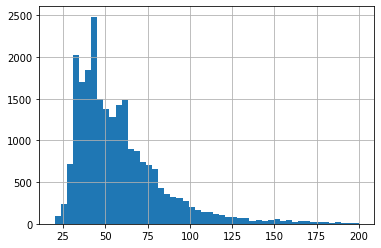

In [120]:
data['total_area'].hist(bins = 50, range = (20, 200))

<AxesSubplot:>

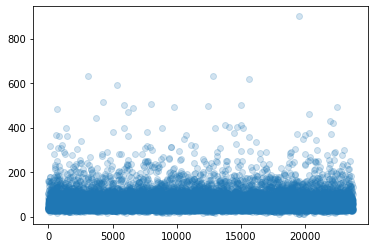

In [123]:
data['total_area'].plot(style='o',figsize=(6, 4), alpha = 0.2)

<AxesSubplot:>

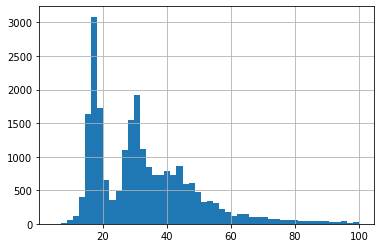

In [124]:
data['living_area'].hist(bins = 50, range = (5, 100))

<AxesSubplot:>

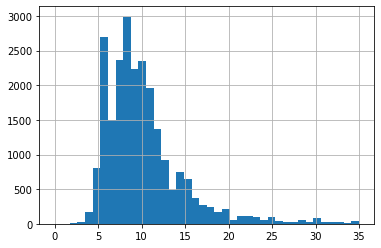

In [125]:
data['kitchen_area'].hist(bins = 40, range = (0, 35))

# Цена квартиры

<AxesSubplot:>

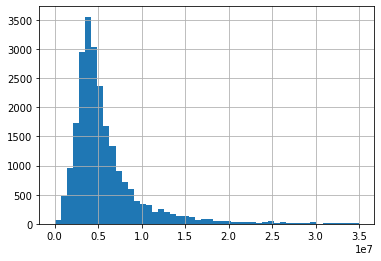

In [126]:
data['last_price'].hist(bins = 50, range = (0, 35000000))

In [ ]:
#data.pivot_table (index = 'last_price').sort_values('price_sqr_meter', ascending = False)

# Количество комнат

<AxesSubplot:>

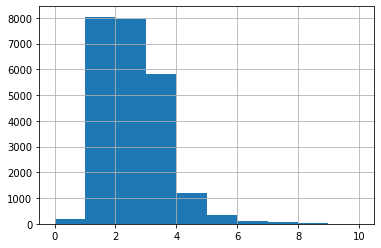

In [127]:
data['rooms'].hist(bins = 10, range = (0, 10))

# Высота потолков

In [128]:
data.loc[data['ceiling_height'] >=20,'ceiling_height'] = data.loc[data['ceiling_height'] >=20, 'ceiling_height']/10
normal_ceiling_height = data.query('(ceiling_height >= 2) & (ceiling_height <= 5)')
data['normal_ceiling_height'] = data['ceiling_height']

<AxesSubplot:>

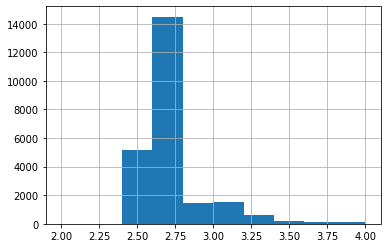

In [129]:
data['normal_ceiling_height'].hist(bins = 10, range = (2, 4))

# Этаж квартиры

<AxesSubplot:>

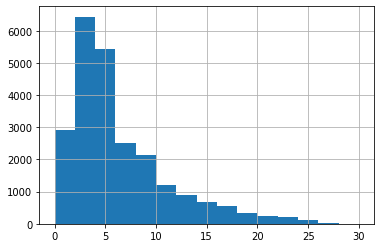

In [131]:
data['floor'].hist(bins = 15, range = (0, 30))

<AxesSubplot:>

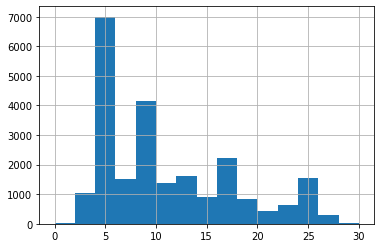

In [132]:
data['floors_total'].hist(bins = 15, range = (0, 30))        

<AxesSubplot:>

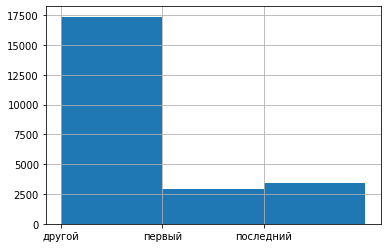

In [133]:
data['floor_type'].hist(bins = 3, range = (0, 3))

# День и месяц публикации объявления

<AxesSubplot:>

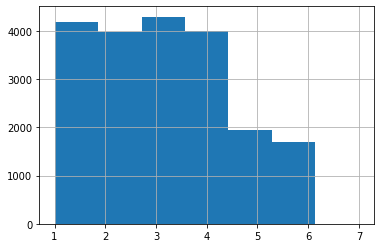

In [134]:
data['weekday'].hist(bins = 7, range = (1, 7))
#data.query('weekday<1')

<AxesSubplot:>

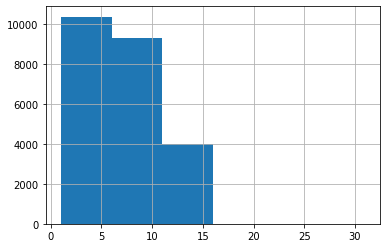

In [135]:
data['month'].hist(bins = 6, range = (1, 31))

# Расстояние до объектов

<AxesSubplot:>

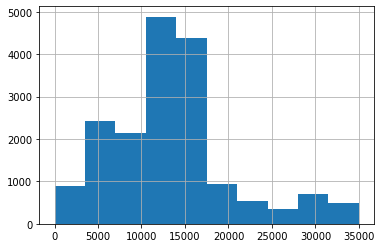

In [136]:
data['cityCenters_nearest'].hist(bins = 10, range = (1, 35000))

In [221]:
#data.query('parks_nearest < 15000').head(60)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locailty_name,price_sqr_meter,weekday,month,year,floor_type,city_centers_nearest,normal_ceiling_height
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0,2.70
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0,2.65
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.785766,9,False,...,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0,2.65
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0,3.03
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.300000,3,False,...,553.0,137.0,Санкт-Петербург,129487.179487,3,11,2017,другой,14.0,2.67
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.000000,5,False,...,298.0,366.0,Петергоф,84523.809524,5,7,2017,последний,33.0,2.56
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.500000,5,False,...,296.0,19.0,Санкт-Петербург,119230.769231,5,11,2017,другой,14.0,2.65
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.600000,1,False,...,NaN,397.0,Санкт-Петербург,81707.317073,3,11,2017,первый,11.0,3.05
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.400000,2,False,...,NaN,168.0,Санкт-Петербург,104838.709677,4,1,2017,другой,11.0,2.50
21,13,3200000,31.6,2018-03-14,1,2.65,5,16.900000,2,False,...,NaN,310.0,Санкт-Петербург,103225.806452,2,3,2018,другой,10.0,2.65


In [ ]:
#data.columns

# Тип этажа квартиры 

<AxesSubplot:>

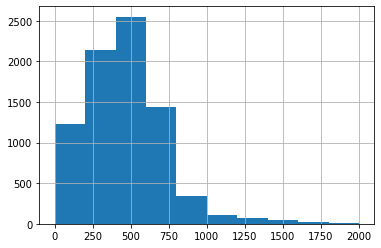

In [137]:
data['parks_nearest'].hist(bins = 10, range = (1, 2000))

In [219]:
#data.query('parks_nearest < 10')


<AxesSubplot:>

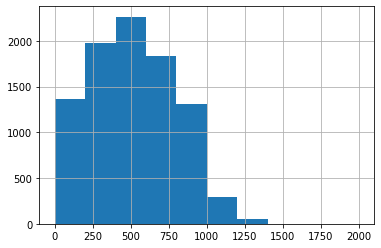

In [138]:
data['ponds_nearest'].hist(bins = 10, range = (1, 2000))

<AxesSubplot:>

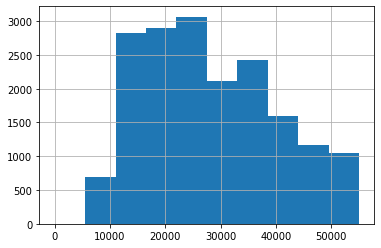

In [139]:
data['airports_nearest'].hist(bins = 10, range = (1, 55000))

In [140]:
#data.query('10000<airports_nearest<20000')
data.query('airports_nearest>40000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name,price_sqr_meter,weekday,month,year,floor_type,city_centers_nearest,normal_ceiling_height
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,NaN,155.0,Парголово,100000.000000,3,11,2017,другой,19.0,2.65
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289.0,Санкт-Петербург,88524.590164,6,2,2017,другой,15.0,2.50
11,9,3300000,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,NaN,7.0,Ломоносов,75000.000000,0,8,2018,другой,52.0,2.65
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,NaN,168.0,Санкт-Петербург,104838.709677,4,1,2017,другой,11.0,2.50
20,12,6120000,80.0,2017-09-28,3,2.70,27,48.0,11,False,...,NaN,74.0,Парголово,76500.000000,3,9,2017,другой,19.0,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23667,14,9990000,90.0,2017-01-23,3,3.06,17,55.0,9,False,...,545.0,86.0,Сестрорецк,111000.000000,0,1,2017,другой,33.0,3.06
23672,5,3000000,30.8,2016-06-08,1,2.65,5,16.1,3,False,...,NaN,808.0,Санкт-Петербург,100000.000000,2,6,2016,другой,14.0,2.65
23685,15,2490000,31.0,2019-01-24,1,2.50,5,17.3,5,False,...,NaN,NaN,Ломоносов,80322.580645,3,1,2019,последний,52.0,2.50
23687,6,3200000,39.0,2017-12-16,1,2.65,9,20.0,6,False,...,NaN,38.0,Санкт-Петербург,82051.282051,5,12,2017,другой,17.0,2.65


# Время продажи квартиры

In [141]:
days_exposition_filtered = data.query('days_exposition != 0')['days_exposition']
days_exposition_median = days_exposition_filtered.median()
days_exposition_mean = days_exposition_filtered.mean()

print ('медиана:',days_exposition_median)
print ('среднее:', days_exposition_mean)


медиана: 95.0
среднее: 180.88863436982163


In [142]:
days_exposition_filtered.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

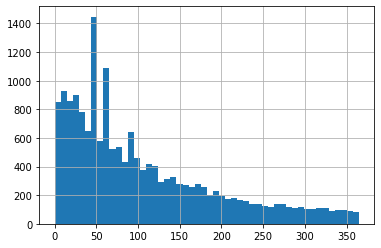

In [143]:
days_exposition_filtered.hist(bins=50, range=(0,365))

# Анализ факторов которые влияют на общую (полную) стоимость объекта

In [144]:
import seaborn as sns 
#sns.boxplot(data = data, y='last_price', x='total_area')


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

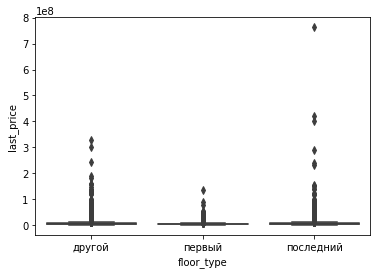

In [145]:
sns.boxplot(data = data, y='last_price', x='floor_type')

In [146]:
data['last_price'].corr(data['total_area'])

0.6536750579657242

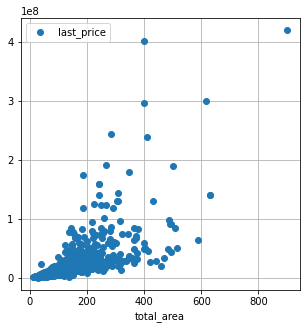

Корреляция цены и общей площади:
            last_price  total_area
last_price    1.000000    0.738972
total_area    0.738972    1.000000


In [147]:
from matplotlib import pyplot as plt

# Зависимость цены от площади
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и общей площади:')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

In [148]:
data_test = data[data['total_area']<250]

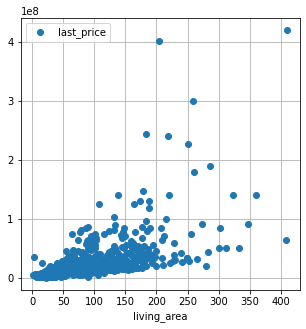

Корреляция цены и жилой площади:
             last_price  living_area
last_price     1.000000     0.626465
living_area    0.626465     1.000000


In [149]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и жилой площади:')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())

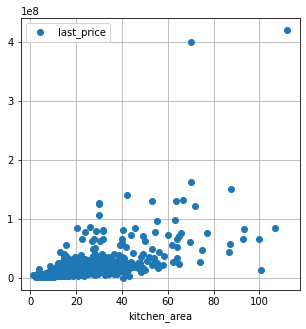

Корреляция цены и площади кухни:
              kitchen_area  last_price
kitchen_area       1.00000     0.30777
last_price         0.30777     1.00000


In [150]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади кухни:')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

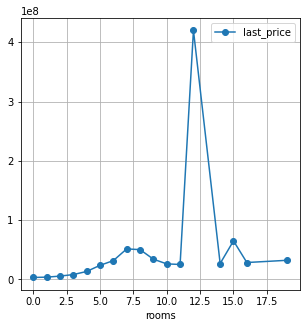

Корреляция цены и числа комнат:
            last_price     rooms
last_price    1.000000  0.442449
rooms         0.442449  1.000000


<AxesSubplot:xlabel='floor'>

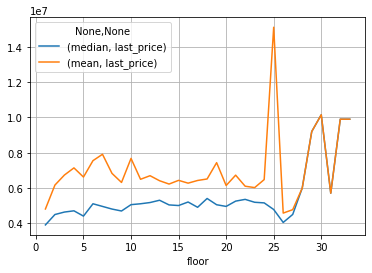

In [151]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr())
data.pivot_table(index='floor', values=['last_price'], aggfunc=['median','mean']).plot(grid=True)

<AxesSubplot:xlabel='floor_type'>

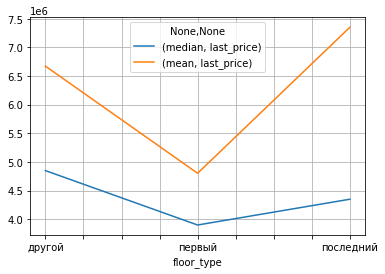

In [152]:
data.pivot_table(index='floor_type', values=['last_price'], aggfunc=['median','mean']).plot(grid=True)

In [153]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name,price_sqr_meter,weekday,month,year,floor_type,city_centers_nearest,normal_ceiling_height
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0,2.70
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,81.0,Шушары,83750.000000,1,12,2018,первый,19.0,2.65
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0,2.65
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.785766,9,False,...,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0,2.65
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,381.0,NaN,Санкт-Петербург,72932.330827,1,3,2017,другой,4.0,3.70
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,...,NaN,45.0,Тосно,52542.372881,0,1,2018,другой,0.0,2.65
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,...,NaN,NaN,Рождествено,44642.857143,6,2,2018,первый,0.0,2.65
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.822689,12,False,...,196.0,602.0,Санкт-Петербург,150986.842105,1,3,2017,другой,10.0,3.00


### Общий вывод

AxesSubplot(0.125,0.125;0.775x0.755)


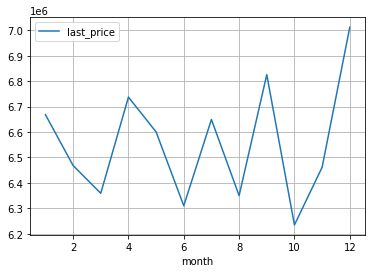

In [154]:
print(data.pivot_table(index='month', values=['last_price']).plot(grid=True))

AxesSubplot(0.125,0.125;0.775x0.755)


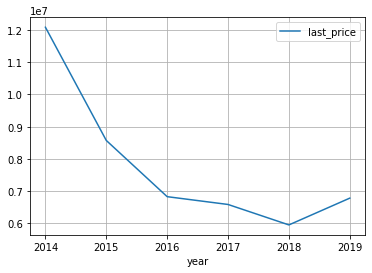

In [155]:
print(data.pivot_table(index='year', values=['last_price']).plot(grid=True))

AxesSubplot(0.125,0.125;0.775x0.755)


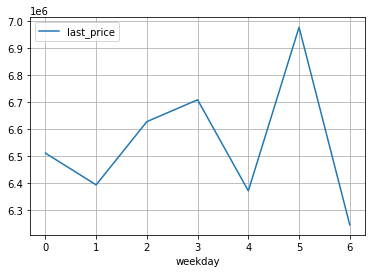

In [156]:
print(data.pivot_table(index='weekday', values=['last_price']).plot(grid=True))

# Сравнение средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [158]:
top_regions = data['locality_name'].value_counts()[:10].index.to_list()
top_regions

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

In [159]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name,price_sqr_meter,weekday,month,year,floor_type,city_centers_nearest,normal_ceiling_height
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0,2.70
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,81.0,Шушары,83750.000000,1,12,2018,первый,19.0,2.65
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0,2.65
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.785766,9,False,...,234.0,424.0,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0,2.65
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,381.0,NaN,Санкт-Петербург,72932.330827,1,3,2017,другой,4.0,3.70
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.000000,4,False,...,NaN,45.0,Тосно,52542.372881,0,1,2018,другой,0.0,2.65
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.700000,1,False,...,NaN,NaN,Рождествено,44642.857143,6,2,2018,первый,0.0,2.65
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.822689,12,False,...,196.0,602.0,Санкт-Петербург,150986.842105,1,3,2017,другой,10.0,3.00


In [169]:
(len(data[data['price_sqr_meter'].isna()]))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23699 non-null  int64         
 1   last_price             23699 non-null  int64         
 2   total_area             23699 non-null  float64       
 3   first_day_exposition   23699 non-null  datetime64[ns]
 4   rooms                  23699 non-null  int64         
 5   ceiling_height         23699 non-null  float64       
 6   floors_total           23699 non-null  int64         
 7   living_area            23699 non-null  float64       
 8   floor                  23699 non-null  int64         
 9   is_apartment           23699 non-null  object        
 10  studio                 23699 non-null  bool          
 11  open_plan              23699 non-null  bool          
 12  kitchen_area           23699 non-null  float64       
 13  b

In [175]:
#data['price_sqr_meter'] = data['price_sqr_meter'].astype(int) 
#data[data['locality_name'].isin(top_regions)].groupby('locality_name')['price_sqr_meter'].apply('mean')


price_sqr_meter = data.query('locality_name in (@top_regions)').pivot_table(values='price_sqr_meter', index='locality_name')
price_sqr_meter = price_sqr_meter.astype(int)
price_sqr_meter.sort_values('price_sqr_meter', ascending=False)





,price_sqr_meter
locality_name,
Санкт-Петербург,115347
Пушкин,103610
Кудрово,95878
Парголово,90675
Мурино,86729
Шушары,79068
Колпино,75735
Гатчина,69045
Всеволожск,68984


In [200]:
data[data['locality_name']=='Санкт-Петербург'].pivot_table(index='floor', 
values=['last_price', 'city_centers_nearest']).corr()

,city_centers_nearest,last_price
city_centers_nearest,1.000000,-0.050917
last_price,-0.050917,1.000000


<AxesSubplot:xlabel='city_centers_nearest'>

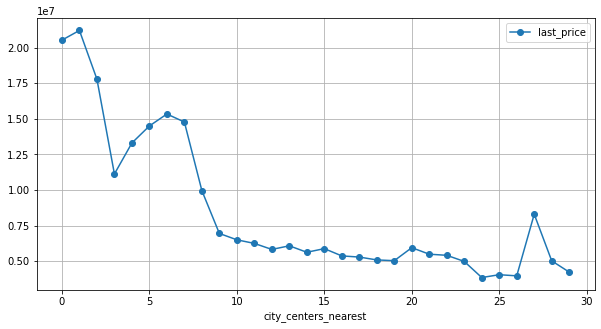

In [301]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, style='o-', figsize=(10, 5))

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод